<a href="https://colab.research.google.com/github/MtHenriqueF/GA-Rastrigin-1/blob/caso-base/GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Montando Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

WORKDIR = '/content/drive/MyDrive/GA'

os.chdir(WORKDIR)
print('Diretório atual:', os.getcwd())


Diretório atual: /content/drive/MyDrive/GA


# Enunciado

O problema para o segundo trabalho de GA é definido pela função Rastrigin [1] é uma função
não convexa usada como um problema de teste de desempenho para algoritmos de
otimização.

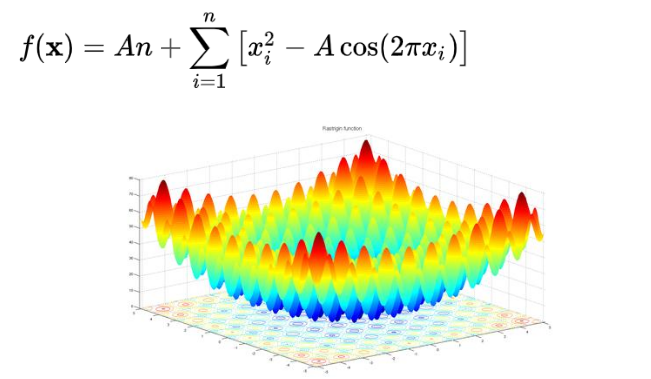

In [6]:
path = '/content/drive/MyDrive/GA/GA.png'
from PIL import Image
Image.open(path)


- **O objetivo é avaliar e testar todos os parâmetros do Algoritmo Genético para encontrar a função de mínimo para o problema no menor tempo possível, ou seja, com a menor quantidade de gerações.** O código em Python desenvolvido a partir da biblioteca *geneticalgorithm2* também está disponível.

- Fundamental, a inclusão de **tabelas que descrevam os parâmetros e valores avaliados desses parâmetros**, além dos resultados obtidos nos testes. Os **gráficos** devem ser anexados para justificar as respostas.

- Também recomendo que não alterem mais de um parâmetro por vez para evitar avaliações indevidas. Fundamental que façam comentários a respeito dos resultados obtidos!

# Informações sobre o trabalho

- Biblioteca do trabalho2
[geneticalgorithm2](https://pypi.org/project/geneticalgorithm2)

- Parâmetros do GA
[parametros-ga](https://github.com/PasaOpasen/geneticalgorithm2)


- Informação funções matemáticas
  - https://github.com/PasaOpasen/OptimizationTestFunctions#rastrigin
  - https://github.com/PasaOpasen/geneticalgorithm2

- Outra biblioteca de GA.
https://pypi.org/project/deap/

– mais crossover no início e mais mutação no final da evolução.

## Estrutura global do algoritmo

```python
# Pre-process: making inner functions depends on params, making/loading start population

while True:

    if reason to stop (time is elapsed / no progress / generation count is reached / min value is reached):
        break


    select parents to crossover from last population and put them to new population:
        select (elit count) best samples
        select (parents count - elit count) random samples (by selection function)

    create (total samples count - parents count) children (samples from selected parents) and put them to new population:
        while not all children are created:
            select 2 random parents
            make child1, child2 from them using crossover
            mutate child1 by mutation (model.mut)
            mutate child2 by middle mutation (model.mut_middle)
            put children to new population
    
    remove duplicates, make revolutions, sort population by scores
    use callbacks, use middle callbacks

# Post-process: plotting results, saving
```

# Instalando dependências

In [4]:
!pip install geneticalgorithm2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.2/67.2 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.2/53.2 kB 3.5 MB/s eta 0:00:00


In [7]:
!pip install geneticalgorithm2[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15077 sha256=080a6cda77b93033aa69c08f72608c3e413e1be8d28e69b5cd699cc90c0070a9
  Stored in directory: /root/.cache/pip/wheels/ed/94/4a/9ccd71f7284a92e4137b7dd0ce8540c40ea7c2689251504a49
Successfully built func-timeout


# Exemplos de uso da biblioteca antes do trabalho:


Set: Average time of function evaluating (secs): 4.210472106933594e-06 (total = 0.0004210472106933594)

Best score before optimization: 2.9593405761528233
                                                                                                                                                                                                        
 The best found solution:
 [0.00106374 0.00014318 0.00200045]

 Objective function:
 0.0032073700063273147

 Used generations: 1500
 Used time: 5.23 seconds


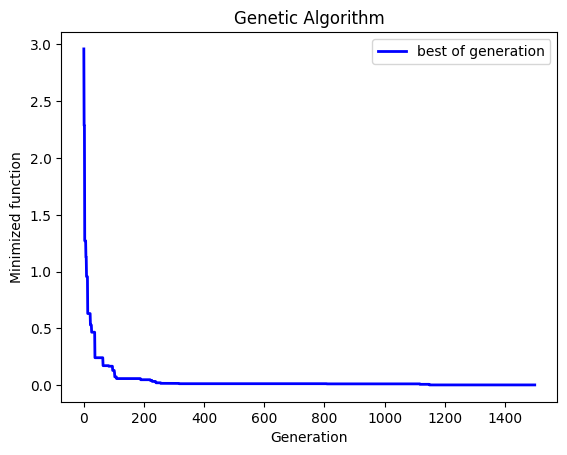

GAResult(last_generation=Generation(variables=array([[1.06374265e-03, 1.43178985e-04, 2.00044837e-03],
       [1.06374265e-03, 1.43178985e-04, 2.00044837e-03],
       [1.06374265e-03, 1.43178985e-04, 2.00044837e-03],
       [1.06374265e-03, 1.43178985e-04, 2.00044837e-03],
       [1.06374265e-03, 1.43178985e-04, 2.00044837e-03],
       [1.06374265e-03, 1.43178985e-04, 2.00044837e-03],
       [1.06374265e-03, 1.43178985e-04, 2.00044837e-03],
       [1.06374265e-03, 1.43178985e-04, 2.00044837e-03],
       [1.06374265e-03, 1.43178985e-04, 2.00044837e-03],
       [1.06374265e-03, 1.43178985e-04, 2.00044837e-03],
       [1.06374265e-03, 1.43178985e-04, 2.00044837e-03],
       [1.06374265e-03, 1.43178985e-04, 2.00044837e-03],
       [1.06374265e-03, 1.43178985e-04, 2.00044837e-03],
       [1.06374265e-03, 1.43178985e-04, 2.00044837e-03],
       [1.06374265e-03, 1.43178985e-04, 2.00044837e-03],
       [1.06374265e-03, 1.43178985e-04, 2.00044837e-03],
       [1.06374265e-03, 1.43178985e-04, 2.

In [8]:
import numpy as np
from geneticalgorithm2 import GeneticAlgorithm2 as ga


def f(X):
    return np.sum(X)


varbound = [[0, 10]] * 3

model = ga(dimension=3, variable_type='real', variable_boundaries=varbound)

model.run(function=f)

In [9]:
model.report

[np.float64(2.9593405761528233),
 np.float64(2.2841959125588773),
 np.float64(2.2841959125588773),
 np.float64(1.2711939064240696),
 np.float64(1.2711939064240696),
 np.float64(1.2711939064240696),
 np.float64(1.2711939064240696),
 np.float64(1.1278617328029317),
 np.float64(1.1278617328029317),
 np.float64(0.9561785273233658),
 np.float64(0.9561785273233658),
 np.float64(0.9561785273233658),
 np.float64(0.9561785273233658),
 np.float64(0.6310929588420899),
 np.float64(0.6310929588420899),
 np.float64(0.6310929588420899),
 np.float64(0.6310929588420899),
 np.float64(0.6310929588420899),
 np.float64(0.6310929588420899),
 np.float64(0.6310929588420899),
 np.float64(0.6310929588420899),
 np.float64(0.6310929588420899),
 np.float64(0.5302384478376698),
 np.float64(0.5302384478376698),
 np.float64(0.5302384478376698),
 np.float64(0.5302384478376698),
 np.float64(0.4669507470271028),
 np.float64(0.4669507470271028),
 np.float64(0.4669507470271028),
 np.float64(0.4669507470271028),
 np.float6

In [10]:
model.result

GAResult(last_generation=Generation(variables=array([[1.06374265e-03, 1.43178985e-04, 2.00044837e-03],
       [1.06374265e-03, 1.43178985e-04, 2.00044837e-03],
       [1.06374265e-03, 1.43178985e-04, 2.00044837e-03],
       [1.06374265e-03, 1.43178985e-04, 2.00044837e-03],
       [1.06374265e-03, 1.43178985e-04, 2.00044837e-03],
       [1.06374265e-03, 1.43178985e-04, 2.00044837e-03],
       [1.06374265e-03, 1.43178985e-04, 2.00044837e-03],
       [1.06374265e-03, 1.43178985e-04, 2.00044837e-03],
       [1.06374265e-03, 1.43178985e-04, 2.00044837e-03],
       [1.06374265e-03, 1.43178985e-04, 2.00044837e-03],
       [1.06374265e-03, 1.43178985e-04, 2.00044837e-03],
       [1.06374265e-03, 1.43178985e-04, 2.00044837e-03],
       [1.06374265e-03, 1.43178985e-04, 2.00044837e-03],
       [1.06374265e-03, 1.43178985e-04, 2.00044837e-03],
       [1.06374265e-03, 1.43178985e-04, 2.00044837e-03],
       [1.06374265e-03, 1.43178985e-04, 2.00044837e-03],
       [1.06374265e-03, 1.43178985e-04, 2.


Set: Average time of function evaluating (secs): 4.956722259521484e-06 (total = 0.0004956722259521484)

Best score before optimization: 4.2808159028843455
                                                                                                                                                                                                        
 The best found solution:
 [5.93709655e-01 1.40647598e+00 2.41620605e-04]

 Objective function:
 2.0004272525781737

 Used generations: 1500
 Used time: 4.9 seconds


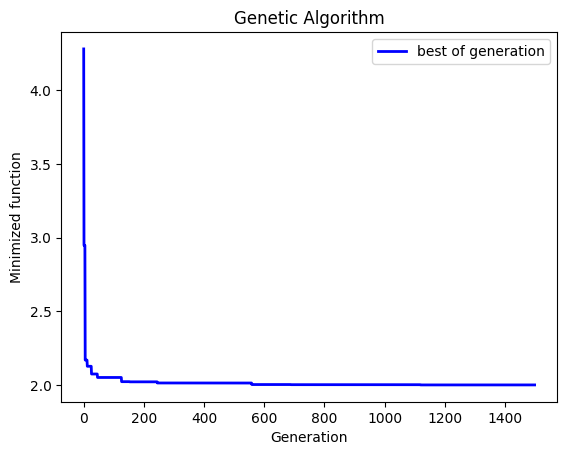

GAResult(last_generation=Generation(variables=array([[5.93709655e-01, 1.40647598e+00, 2.41620605e-04],
       [5.93709655e-01, 1.40647598e+00, 2.41620605e-04],
       [5.93709655e-01, 1.40647598e+00, 2.41620605e-04],
       [5.93709655e-01, 1.40647598e+00, 2.41620605e-04],
       [5.93709655e-01, 1.40647598e+00, 2.41620605e-04],
       [5.93709655e-01, 1.40647598e+00, 2.41620605e-04],
       [5.93709655e-01, 1.40647598e+00, 2.41620605e-04],
       [5.93709655e-01, 1.40647598e+00, 2.41620605e-04],
       [5.93709655e-01, 1.40647598e+00, 2.41620605e-04],
       [5.93709655e-01, 1.40647598e+00, 2.41620605e-04],
       [5.93709655e-01, 1.40647598e+00, 2.41620605e-04],
       [5.93709655e-01, 1.40647598e+00, 2.41620605e-04],
       [5.93709655e-01, 1.40647598e+00, 2.41620605e-04],
       [5.93709655e-01, 1.40647598e+00, 2.41620605e-04],
       [5.93709655e-01, 1.40647598e+00, 2.41620605e-04],
       [5.93709655e-01, 1.40647598e+00, 2.41620605e-04],
       [5.93709655e-01, 1.40647598e+00, 2.

In [11]:
import numpy as np
from geneticalgorithm2 import GeneticAlgorithm2 as ga


def f(X):
    pen = 0
    if X[0] + X[1] < 2:
        pen = 500 + 1000 * (2 - X[0] - X[1])
    return np.sum(X) + pen


varbound = [[0, 10]] * 3

model = ga(dimension=3, variable_type='real', variable_boundaries=varbound)

model.run(function=f)

In [12]:
model.report

[np.float64(4.2808159028843455),
 np.float64(2.94793794675956),
 np.float64(2.94793794675956),
 np.float64(2.94793794675956),
 np.float64(2.94793794675956),
 np.float64(2.1690511903019596),
 np.float64(2.1690511903019596),
 np.float64(2.1690511903019596),
 np.float64(2.1690511903019596),
 np.float64(2.1690511903019596),
 np.float64(2.1690511903019596),
 np.float64(2.1690511903019596),
 np.float64(2.12697026033345),
 np.float64(2.12697026033345),
 np.float64(2.12697026033345),
 np.float64(2.12697026033345),
 np.float64(2.12697026033345),
 np.float64(2.12697026033345),
 np.float64(2.12697026033345),
 np.float64(2.12697026033345),
 np.float64(2.12697026033345),
 np.float64(2.12697026033345),
 np.float64(2.12697026033345),
 np.float64(2.12697026033345),
 np.float64(2.12697026033345),
 np.float64(2.12697026033345),
 np.float64(2.0745345762075553),
 np.float64(2.0745345762075553),
 np.float64(2.0745345762075553),
 np.float64(2.0745345762075553),
 np.float64(2.0745345762075553),
 np.float64(2

In [13]:
model.result

GAResult(last_generation=Generation(variables=array([[5.93709655e-01, 1.40647598e+00, 2.41620605e-04],
       [5.93709655e-01, 1.40647598e+00, 2.41620605e-04],
       [5.93709655e-01, 1.40647598e+00, 2.41620605e-04],
       [5.93709655e-01, 1.40647598e+00, 2.41620605e-04],
       [5.93709655e-01, 1.40647598e+00, 2.41620605e-04],
       [5.93709655e-01, 1.40647598e+00, 2.41620605e-04],
       [5.93709655e-01, 1.40647598e+00, 2.41620605e-04],
       [5.93709655e-01, 1.40647598e+00, 2.41620605e-04],
       [5.93709655e-01, 1.40647598e+00, 2.41620605e-04],
       [5.93709655e-01, 1.40647598e+00, 2.41620605e-04],
       [5.93709655e-01, 1.40647598e+00, 2.41620605e-04],
       [5.93709655e-01, 1.40647598e+00, 2.41620605e-04],
       [5.93709655e-01, 1.40647598e+00, 2.41620605e-04],
       [5.93709655e-01, 1.40647598e+00, 2.41620605e-04],
       [5.93709655e-01, 1.40647598e+00, 2.41620605e-04],
       [5.93709655e-01, 1.40647598e+00, 2.41620605e-04],
       [5.93709655e-01, 1.40647598e+00, 2.

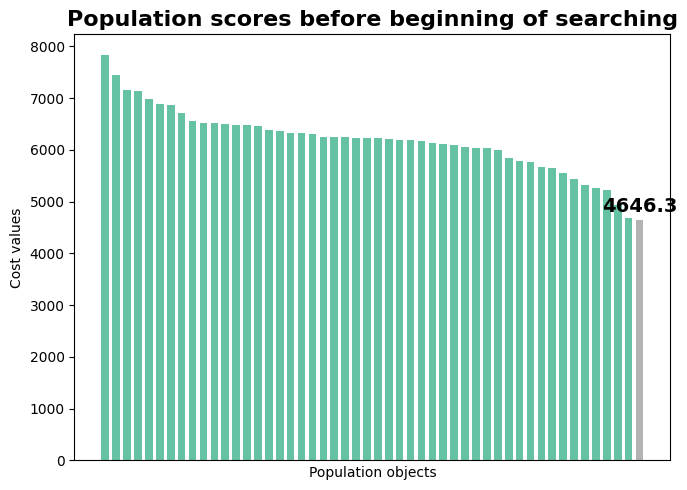


First scores are from gotten population

Best score before optimization: 4646.303764322458
                                                                                                                                                                                                        
 The best found solution:
 [0.04128679 0.01292501 0.04785716 0.25156221 0.09845614 0.0533078
 0.13205455 0.04100704 0.06000956 0.10628681 0.09729385 0.22632418
 0.1098222  0.02324391 0.33897743 0.01648594 0.02380653 0.00939301
 0.06163944 0.01234251 0.02959956 0.08575018 0.01486307 0.15986793
 0.08999254]

 Objective function:
 106.39755045040513

 Used generations: 8000
 Used time: 25.6 seconds


GAResult(last_generation=Generation(variables=array([[0.04128679, 0.01292501, 0.04785716, ..., 0.01486307, 0.15986793,
        0.08999254],
       [0.04128679, 0.01292501, 0.04785716, ..., 0.01486307, 0.15986793,
        0.08999254],
       [0.04128679, 0.01292501, 0.04785716, ..., 0.01486307, 0.15986793,
        0.08999254],
       ...,
       [6.66021664, 0.01292501, 9.22493542, ..., 0.01486307, 0.15986793,
        0.08999254],
       [0.04128679, 3.07208939, 0.04785716, ..., 9.7709624 , 0.15986793,
        0.08999254],
       [0.04128679, 0.01292501, 0.04785716, ..., 7.70173325, 0.15986793,
        0.08999254]]), scores=array([ 106.39755045,  106.39755045,  279.43145494,  500.39737662,
        519.85195841,  541.89393156,  559.00962649,  587.72516986,
        616.91957232,  763.47290237,  844.27500086,  864.272263  ,
        934.65069095,  934.65069095,  960.06062785, 1021.63922563,
       1030.93652438, 1069.58705181, 1089.43480616, 1122.86785271,
       1182.43423605, 1197.7186246

In [16]:
import numpy as np

from geneticalgorithm2 import GeneticAlgorithm2 as ga

from geneticalgorithm2 import plot_pop_scores  # for plotting scores without ga object


def f(X):
    return 50 * np.sum(X) - np.sum(np.sqrt(X) * np.sin(X))


dim = 25
varbound = [[0, 10]] * dim

# create start population
start_pop = np.random.uniform(0, 10, (50, dim))
# eval scores of start population
start_scores = np.array([f(start_pop[i]) for i in range(start_pop.shape[0])])

# plot start scores using plot_pop_scores function
plot_pop_scores(start_scores, title='Population scores before beginning of searching', save_as='plot_scores_start.png')

model = ga(function=f, dimension=dim, variable_type='real', variable_boundaries=varbound)
# run optimization process
model.run(no_plot=True,
          start_generation={
              'variables': start_pop,
              'scores': start_scores
          })
# plot and save optimization process plot
# model.plot_results(save_as='plot_scores_process.png')

# plot scores of last population
# model.plot_generation_scores(title='Population scores after ending of searching', save_as='plot_scores_end.png')

#Caso base

## Interpretando enunciado e definindo os parâmetros essenciais

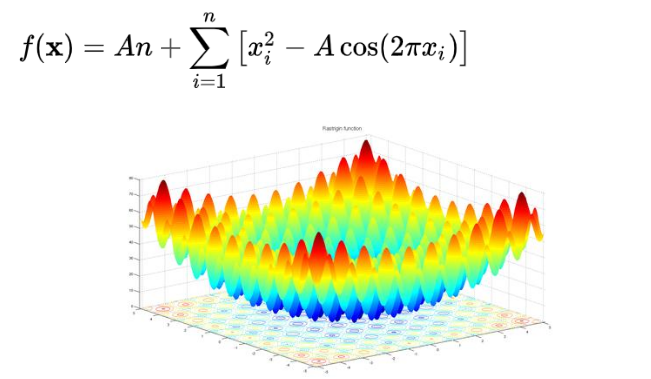

In [17]:
path = '/content/drive/MyDrive/GA/GA.png'
from PIL import Image
Image.open(path)


O enunciado pede para minimizar a funcão e o seu gráfico é 3D e F(x) tem dimensão 1A, então a dimensão de x é 2 ou seja, nossos cromossomos tem 2 'casas' reais.

Com base no enunciado e sabendo que x não tem restrições podemos também escrever a funcão que define a nossa avaliação, que será normalizada e virará aptidao.

O valor padrão e universalmente aceito para o parâmetro A na função de Rastrigin é 10. Portanto podemos definir a funcão de avaliação para nosso problema:


In [21]:
A = 10
n = 2

In [22]:
def rastrigin_generic(X, A, n):
    termo_quadratico = np.sum(X**2)
    termo_cosseno = np.sum(A * np.cos(2 * np.pi * X))
    return A * n + termo_quadratico - termo_cosseno

funcao_objetivo = lambda X: rastrigin_generic(X, A=A, n=n)


Por definição x de [Rastrigin](https://en.wikipedia.org/wiki/Rastrigin_function)
varia entre [-5.12, 5.12] então já podemos definir varbound também


In [20]:
varbound = np.array([[-5.12, 5.12]] * 2)

Além disso, variable_type='real', por definição também.
